In [16]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

# scaling data
from sklearn.preprocessing import StandardScaler

# K means Clustering
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA,IncrementalPCA

# hierarchical clustering
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [17]:
path_to_dataDes_csv = "/home/kali/Downloads/DATA/Unsupervised_CountryData/data-dictionary.csv"
data_des = read_csv(path_to_dataDes_csv)
data_des

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [18]:
path_to_csv = "/home/kali/Downloads/DATA/Unsupervised_CountryData/Country-data.csv"
data_dict = read_csv(path_to_csv)
data_dict

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [19]:
print("There are {} countries and {} features - ".format(data_dict.shape[0],data_dict.shape[1]))
print()
data_dict.head()

There are 167 countries and 10 features - 



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
# Converting exports, health and imports variables into specified percentages of GDPP

data_dict['exports'] = data_dict['exports'] * data_dict['gdpp'] / 100
data_dict['imports'] = data_dict['imports'] * data_dict['gdpp'] / 100
data_dict['health'] = data_dict['health'] * data_dict['gdpp'] / 100

data_dict.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<AxesSubplot:>

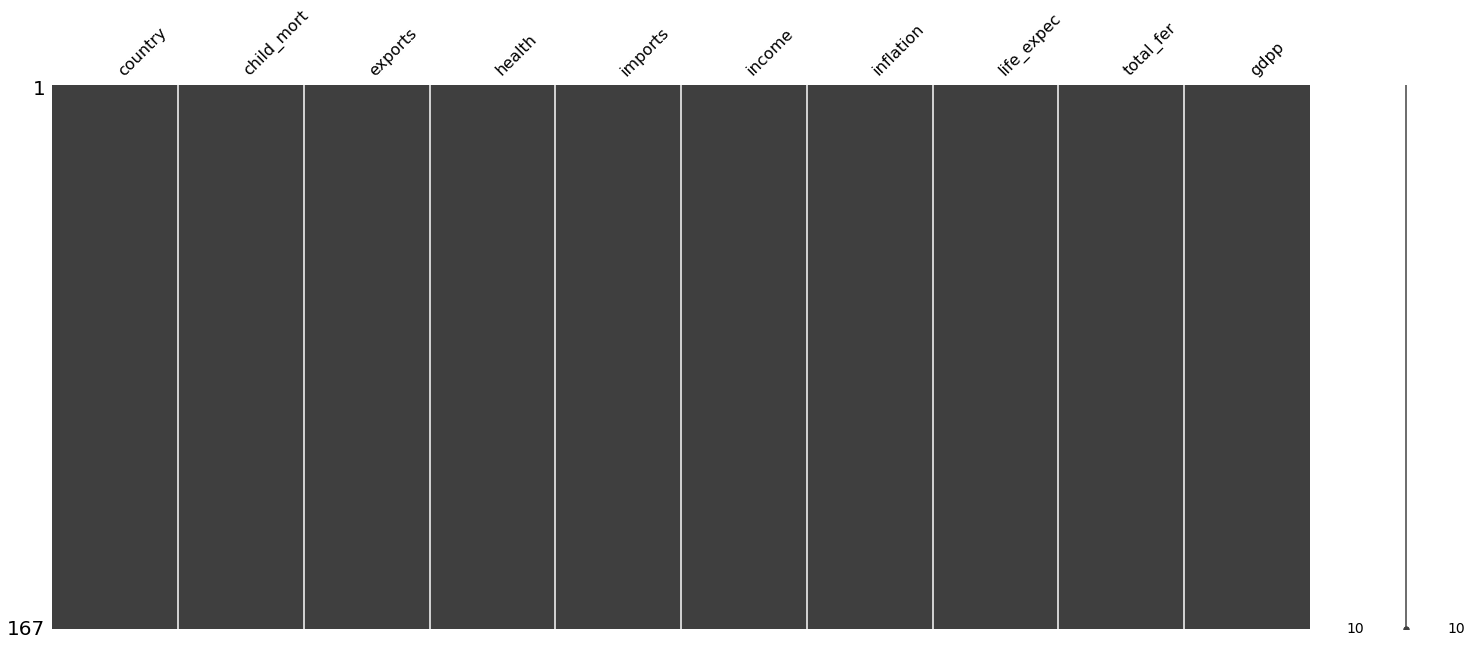

In [21]:
# Visualising Missing Values
msno.matrix(data_dict)

<AxesSubplot:>

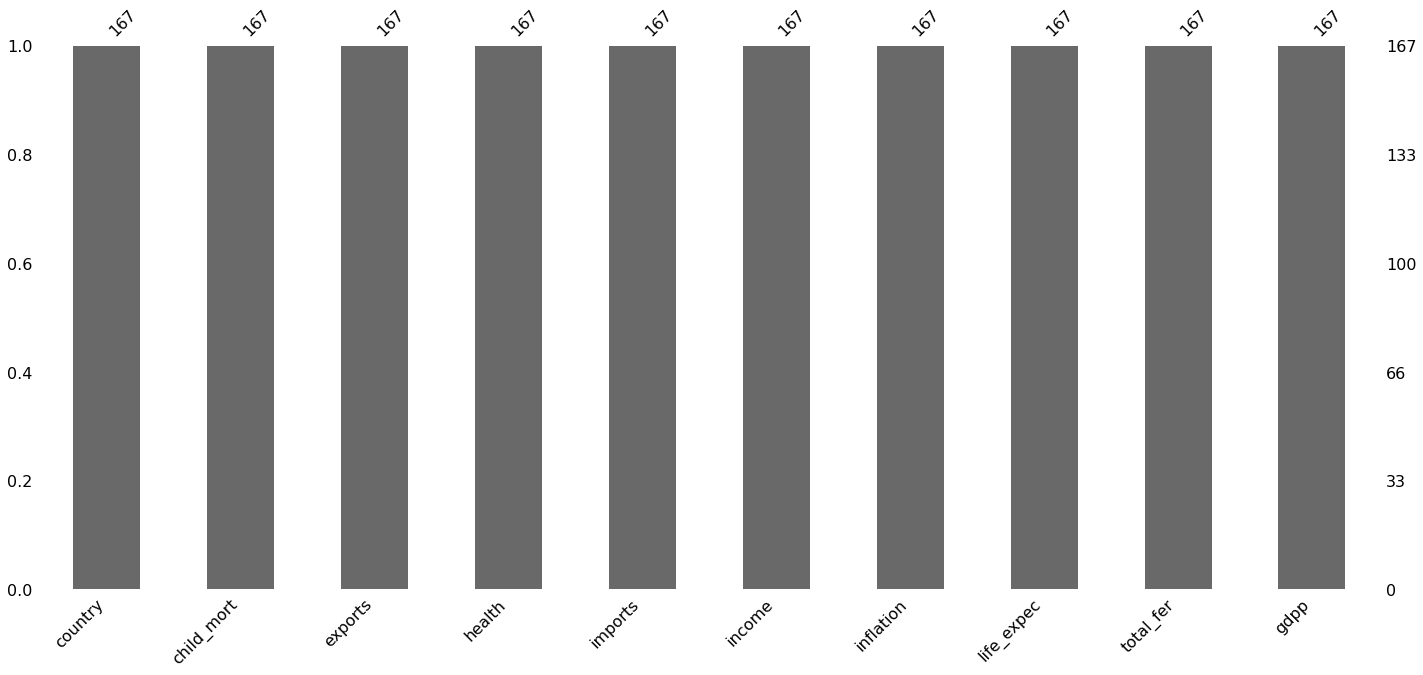

In [22]:
# Visualising Missing Values
msno.bar(data_dict)

In [23]:
print("Sum of null Values - \n",data_dict.isnull().sum())
print()
print("Sum of Nan Values - \n",data_dict.isna().sum())

Sum of null Values - 
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Sum of Nan Values - 
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [24]:
data_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [25]:
# finding duplicates
print("Duplicates in Dataset {}".format(len(data_dict[data_dict.duplicated()])))

Duplicates in Dataset 0


In [26]:
# checking outliers at 25%,50%,75%,90%,95%,99%
data_dict.describe(percentiles=[.25,.5,.75,.90,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

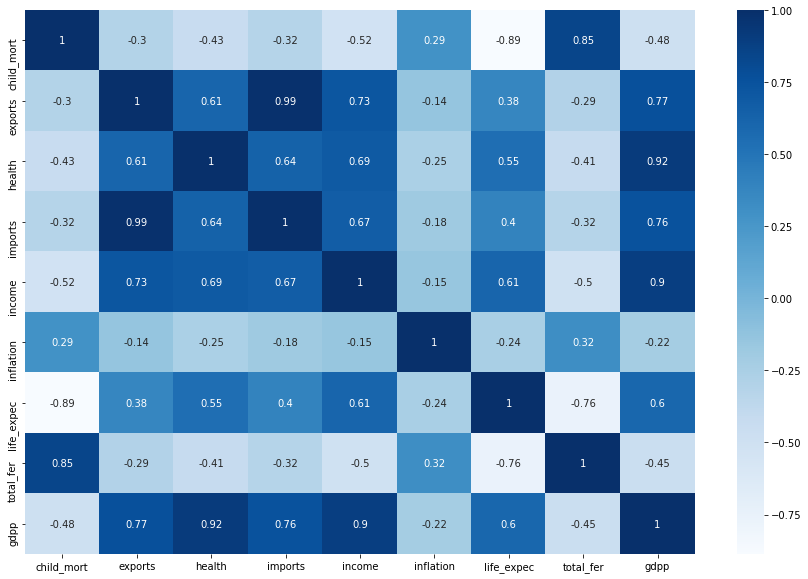

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data_dict.corr(),annot=True,cmap='Blues')# .get_figure()

Based on above correlation heatmap, we can get the following insights
- exports are highly correlated with imports.
- exports, health, imports, income are highly correlated with gdpp.
- total_fer is highly correlated with child_mort.
- total_fer is highly negative correlated with life_expec.
- child_mort is highly negative corrleated with life_expec.

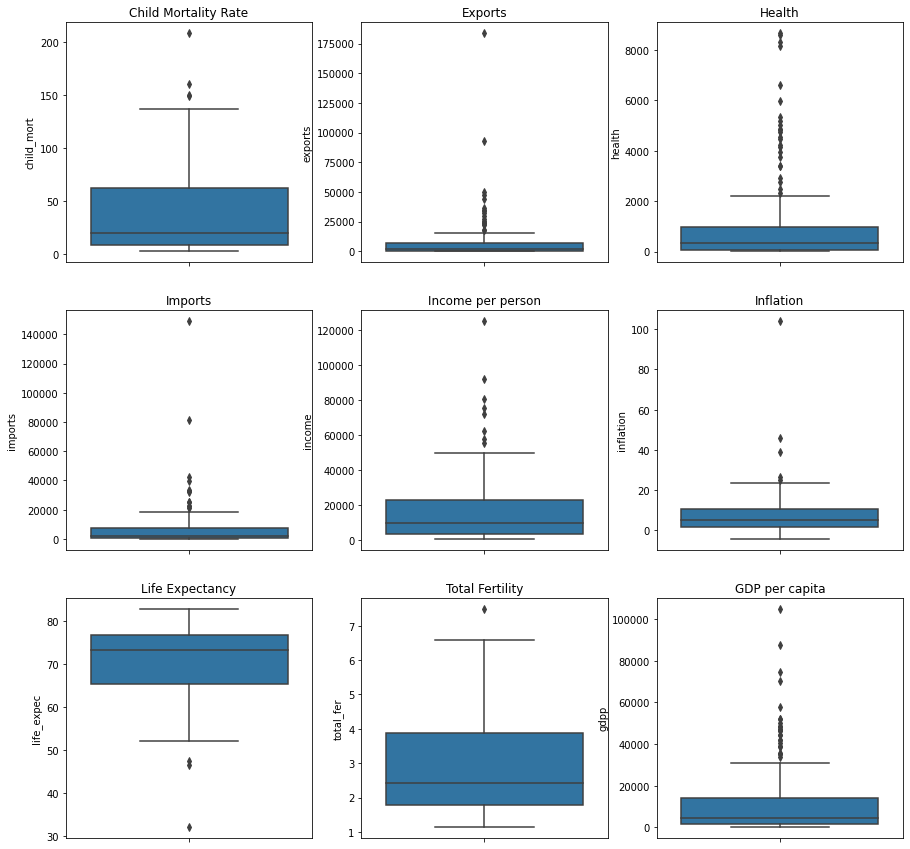

In [28]:
# boxplot for each numerical variable
f,axes = plt.subplots(3,3,figsize=(15,15))

s = sns.boxplot(y=data_dict.child_mort,ax=axes[0,0]).set_title('Child Mortality Rate')

s = sns.boxplot(y=data_dict.exports,ax=axes[0,1]).set_title('Exports')

s = sns.boxplot(y=data_dict.health,ax=axes[0,2]).set_title('Health')

s = sns.boxplot(y=data_dict.imports,ax=axes[1,0]).set_title('Imports')

s = sns.boxplot(y=data_dict.income,ax=axes[1,1]).set_title('Income per person')

s = sns.boxplot(y=data_dict.inflation,ax=axes[1,2]).set_title('Inflation')

s = sns.boxplot(y=data_dict.life_expec,ax=axes[2,0]).set_title('Life Expectancy')

s = sns.boxplot(y=data_dict.total_fer,ax=axes[2,1]).set_title('Total Fertility')

s = sns.boxplot(y=data_dict.gdpp,ax=axes[2,2]).set_title('GDP per capita')

plt.show()

Based above Boxplots 
- In, gdpp and health, there are too many outliers.

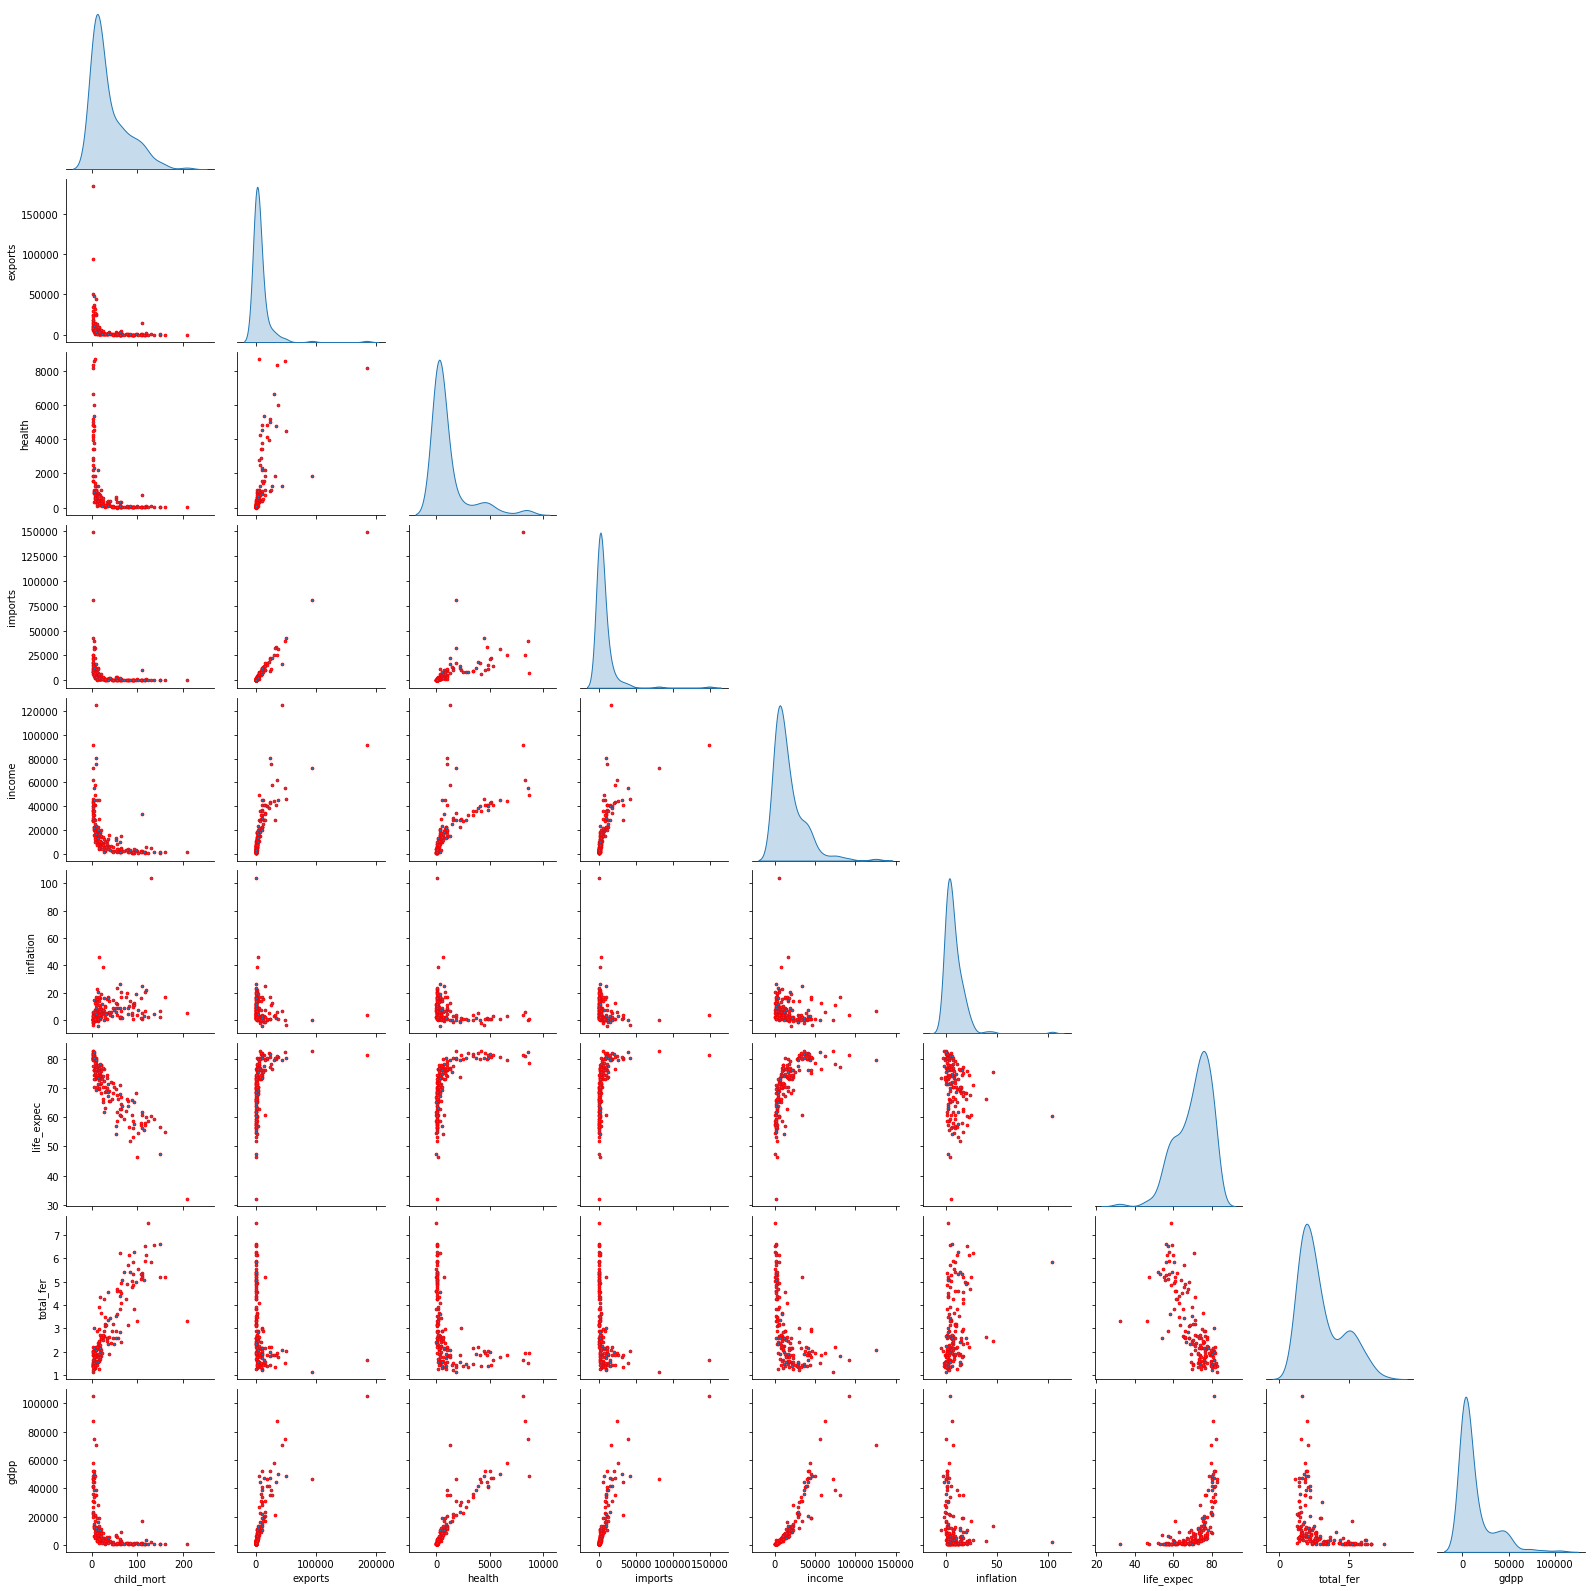

In [29]:
pair = sns.pairplot(data_dict,diag_kind='kde',corner=True,plot_kws=dict(s=7,edgecolor="r",linewidth=1))

Based in above Pair Plot
- Only life_expec is right-skewed whereas all the rest features are left-skewed. 
- total_fer and gdpp are bimodal whereas all the rest features are unimodal.

1. linear relation is found between gdpp-income, imports-exports, total_fer-child_mort.
2. IF gdpp is high:
      - child mortality is low
      - income is high
      - inflation is low
      - life expectancy is high
      - total fertility is low
      - health, imports and exports are MEDIUM

In [30]:
# droping string feature country name
features = data_dict.drop(columns=['country'])

# scaler object
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)
feature_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [31]:
pca = PCA(svd_solver='randomized',random_state=0)

# fitting pca on dataset
pca.fit(feature_scaled)

print("{} pca components. \nList of components- \n {}".format(pca.n_components_,pca.components_))

9 pca components. 
List of components- 
 [[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
   0.34385651 -0.30284224  0.39998795]
 [ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
  -0.36981973  0.4597152   0.2006241 ]
 [-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
   0.19675173 -0.07783431  0.01033941]
 [-0.14805195  0.44942527 -0.59971228  0.46179779 -0.15480592 -0.00762798
  -0.01839465 -0.21392805 -0.36477239]
 [ 0.1019948  -0.03853829 -0.49319984 -0.2527867   0.79407469 -0.13642345
  -0.15404105 -0.02033568  0.08750149]
 [ 0.19658519 -0.03891112  0.18069888 -0.01217988 -0.03814681  0.10840284
  -0.58600986 -0.75390075  0.04538167]
 [ 0.76126725 -0.01366973 -0.06461567  0.02718244 -0.02311312 -0.02207663
   0.58120846 -0.27314534 -0.04402264]
 [ 0.00644411 -0.05526371  0.43007213  0.1311355   0.3938113  -0.00607016
   0.002966    0.03429334 -0.79902242]
 [-0.00495137 -0.71792388 -0.13034593  0.66568664  0.07

The comulative variance of pca components of the 5 principal components is 0.96395


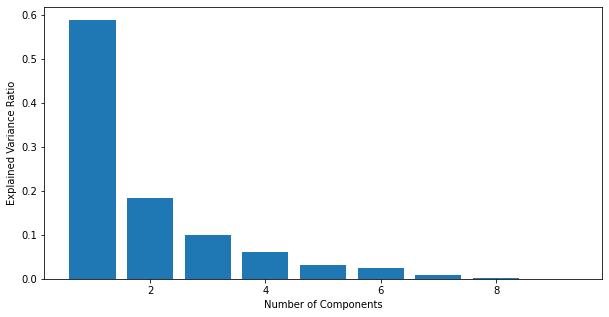

In [32]:
comp = range(1,pca.n_components_ + 1)

print("The comulative variance of pca components of the 5 principal components is {}".format(round(pca.explained_variance_ratio_.cumsum()[4],5)))

# plotting bar plot 
plt.figure(figsize=(10,5))
plt.bar(comp,pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

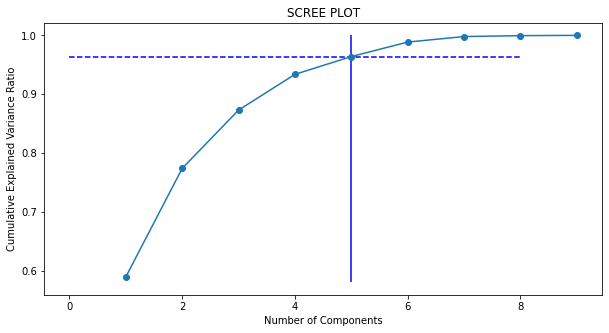

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
plt.plot(comp,np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.title('SCREE PLOT')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.vlines(x=5, ymax=1, ymin=0.58, colors="b", linestyles="-")
plt.hlines(y=pca.explained_variance_ratio_.cumsum()[4], xmax=8, xmin=0, colors="b", linestyles="--") 
plt.show()

From Above scree plot, around 96% of the information being expained by 5 components.

In [34]:
# create dataframe using first 5 pca components 
colnames = list(features.columns)

pca_data = pd.DataFrame({'Features':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4]})

pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


/home/kali/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


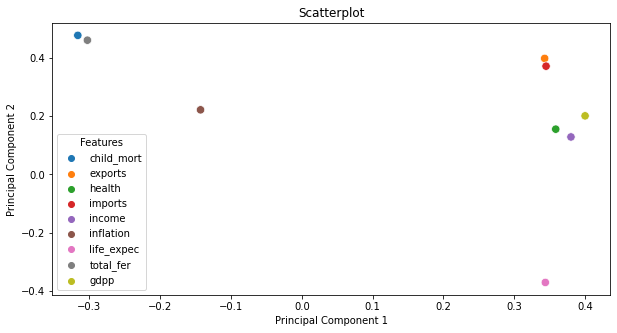

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.scatterplot(pca_data.PC1,pca_data.PC2,s=70,markers='o',hue=pca_data.Features)
plt.title('Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

From the above plot
- we can see the first component is in the direction where the imports, exports, gdpp,income, health,life_expec are heavy and second component is in the direction where child_mort , total_fer is more.
- If you recall, correlation between imports and exports was 0.99. Now we can surely confirm it by looking the above plot.

In [36]:
ipca = IncrementalPCA(n_components=5).fit_transform(feature_scaled)
ipcat = np.transpose(ipca)
ipcat.shape
pca_data = pd.DataFrame({'PC1':ipcat[0],'PC2':ipcat[1],'PC3':ipcat[2],'PC4':ipcat[3],'PC5':ipcat[4]})
pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


In [37]:
# K Means Clustering

ks = list(range(1,10))
plt.figure(figsize=(10,5))
ssd = []

for num_clusters in ks:
  model = KMeans(n_clusters=num_clusters,max_iter=50)
  model.fit(pca_data)
  ssd.append(model.inertia_)
  print(ssd)

[1448.6946498887494]
[1448.6946498887494, 888.0171941349894]
[1448.6946498887494, 888.0171941349894, 597.3390455379325]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754, 348.7202918286071]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754, 348.7202918286071, 297.3922377015441]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754, 348.7202918286071, 297.3922377015441, 258.0552904557979]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754, 348.7202918286071, 297.3922377015441, 258.0552904557979, 225.53400827337595]
[1448.6946498887494, 888.0171941349894, 597.3390455379325, 425.99701098795754, 348.7202918286071, 297.3922377015441, 258.0552904557979, 225.53400827337595, 191.56088833083072]


<Figure size 720x360 with 0 Axes>

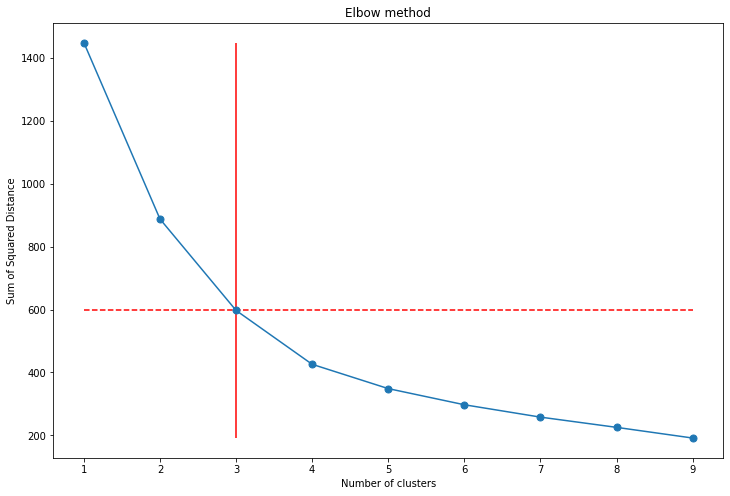

In [38]:
plt.figure(figsize=(12,8))
plt.plot(ks,ssd,marker='o',markersize=7)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2],xmax=9,xmin=1,colors="r",linestyles="--") 
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

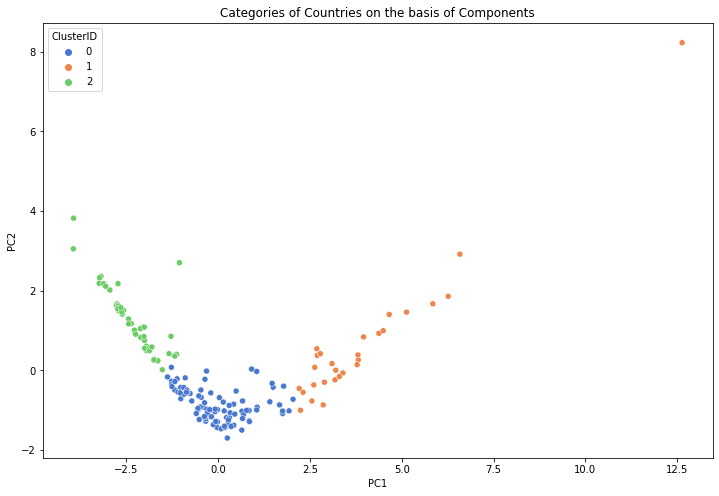

In [39]:
# choosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters=3,max_iter=50,random_state=50)
kmeans.fit(pca_data.iloc[:,:5])

pca_data['ClusterID'] = pd.Series(kmeans.labels_)
plt.figure(figsize=(12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=pca_data,palette="muted",legend="full")
plt.title('Categories of Countries on the basis of Components')
plt.show()

From above plot we can clearly see the 3 clusters

In [40]:
finaldf = pd.merge(data_dict,pca_data['ClusterID'],left_index=True,right_index=True)
finaldf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [41]:
# calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_gdpp = pd.DataFrame(finaldf.groupby(['ClusterID']).gdpp.mean())
Cluster_child_mort = pd.DataFrame(finaldf.groupby(['ClusterID']).child_mort.mean())
Cluster_income = pd.DataFrame(finaldf.groupby(['ClusterID']).income.mean())
k_mean_df = pd.concat([Cluster_gdpp,Cluster_child_mort,Cluster_income],axis=1)
k_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,7979.912088,20.357143,13968.021978
1,48114.285714,5.046429,50178.571429
2,1909.208333,91.610417,3897.354167


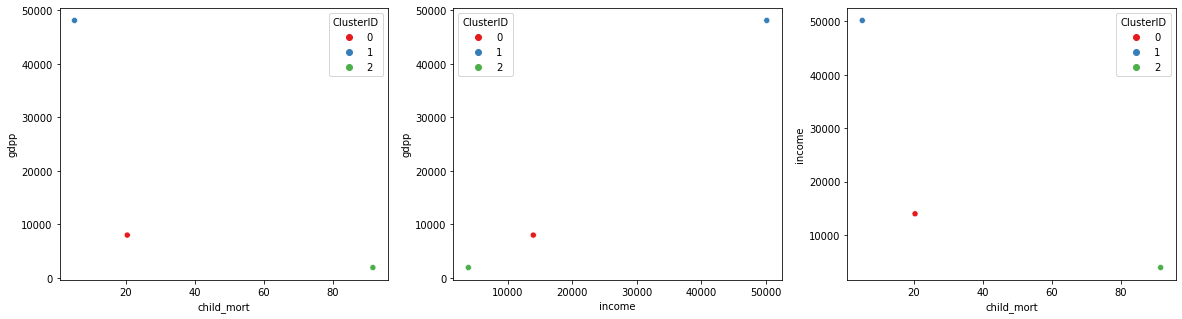

In [42]:
f,axes = plt.subplots(1,3,figsize=(20,5))

s = sns.scatterplot(x='child_mort',y='gdpp',data=k_mean_df,ax=axes[0],palette="Set1",hue=k_mean_df.index)
s = sns.scatterplot(x='income',y='gdpp',data=k_mean_df,ax=axes[1],palette="Set1",hue=k_mean_df.index)
s = sns.scatterplot(x='child_mort',y='income',data=k_mean_df,ax=axes[2],palette="Set1",hue=k_mean_df.index)

- Countries with high gdpp and low child mortality are the developed countries (Cluster 1)
- Countries with low gdpp and low child mortality are the developing countries (Cluster 0)
- Countries with low gdpp and high child mortality are the Under-developing countries (Cluster 2)

In [43]:
# Let's remain according to above
k_mean_df.rename(index={0:'Developing'},inplace=True)
k_mean_df.rename(index={1:'Developed'},inplace=True)
k_mean_df.rename(index={2:'Under-Developed'},inplace=True)
k_mean_df

,gdpp,child_mort,income
ClusterID,,,
Developing,7979.912088,20.357143,13968.021978
Developed,48114.285714,5.046429,50178.571429
Under-Developed,1909.208333,91.610417,3897.354167


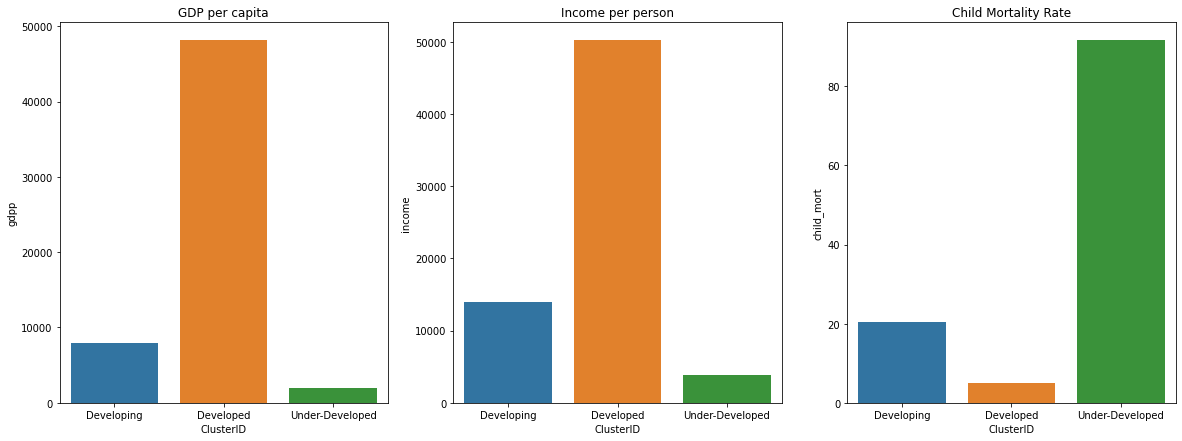

In [44]:
f,axes = plt.subplots(1,3,figsize=(20,7))

s = sns.barplot(x=k_mean_df.index,y='gdpp',data=k_mean_df,ax=axes[0]).set_title('GDP per capita')
s = sns.barplot(x=k_mean_df.index,y='income',data=k_mean_df,ax=axes[1]).set_title('Income per person')
s = sns.barplot(x=k_mean_df.index,y='child_mort',data=k_mean_df,ax=axes[2]).set_title('Child Mortality Rate')
plt.show()

- From above bar chart ,
1. All the developed countries are having high GDP per capita values,developing countries are having average GDP per capita while  under-developed countries are having least GDP per capita values.
2. All the developed countries are having high Income per person,developing coutries are having average Income per person, while under-developed countries are having least Income per person.
3. All the developed countries are having low number of death of children under 5 years of age per 1000 live births,developing countries are having average death-rate and under-developed countries are having the high death-rate

In [45]:
for i,cluster in enumerate(finaldf.ClusterID):
  if cluster == 0:
    finaldf.loc[i,'Clustered Countries']='Developing'
  elif cluster == 1:
    finaldf.loc[i,'Clustered Countries']='Developed'
  else:
    finaldf.loc[i,'Clustered Countries']='Under-Developed'

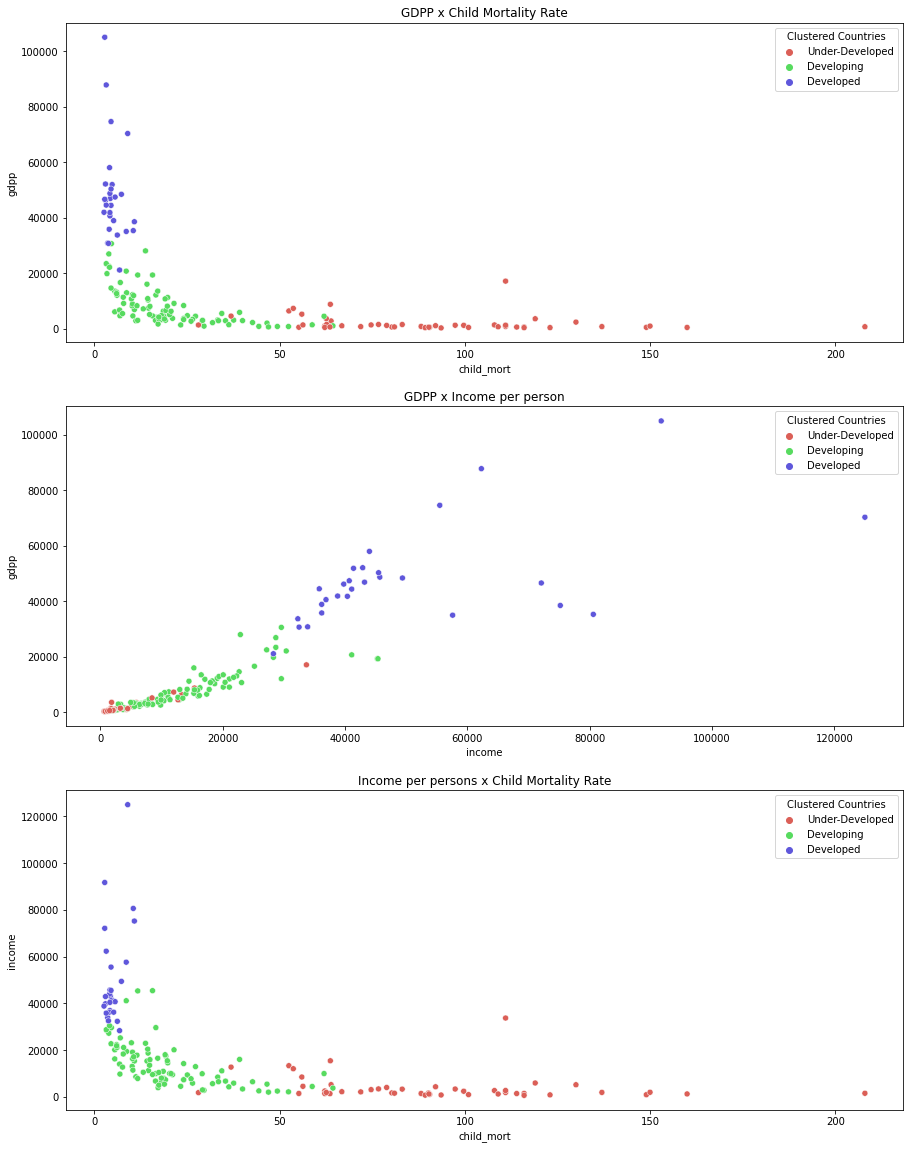

In [46]:
f,axes = plt.subplots(3,1,figsize=(15,20))

s = sns.scatterplot(x='child_mort',y='gdpp',hue='Clustered Countries',legend='full',data=finaldf,palette=sns.color_palette("hls",3),ax=axes[0]).set_title('GDPP x Child Mortality Rate')
s = sns.scatterplot(x='income',y='gdpp',hue='Clustered Countries',legend='full',data=finaldf,palette=sns.color_palette("hls",3),ax=axes[1]).set_title('GDPP x Income per person')
s = sns.scatterplot(x='child_mort',y='income',hue='Clustered Countries',legend='full',data=finaldf,palette=sns.color_palette("hls",3),ax=axes[2]).set_title('Income per persons x Child Mortality Rate')

From Above Plot,

1. In gdpp x child_mort, there is some clustering where gdpp is more, there child-mort is low, which is a FACT.
2. In gdpp x income, there is some clustering where gdpp is more, then income is also more.
3. In income x child_mort, there is some clustering where if child_mort is more, then income is less.


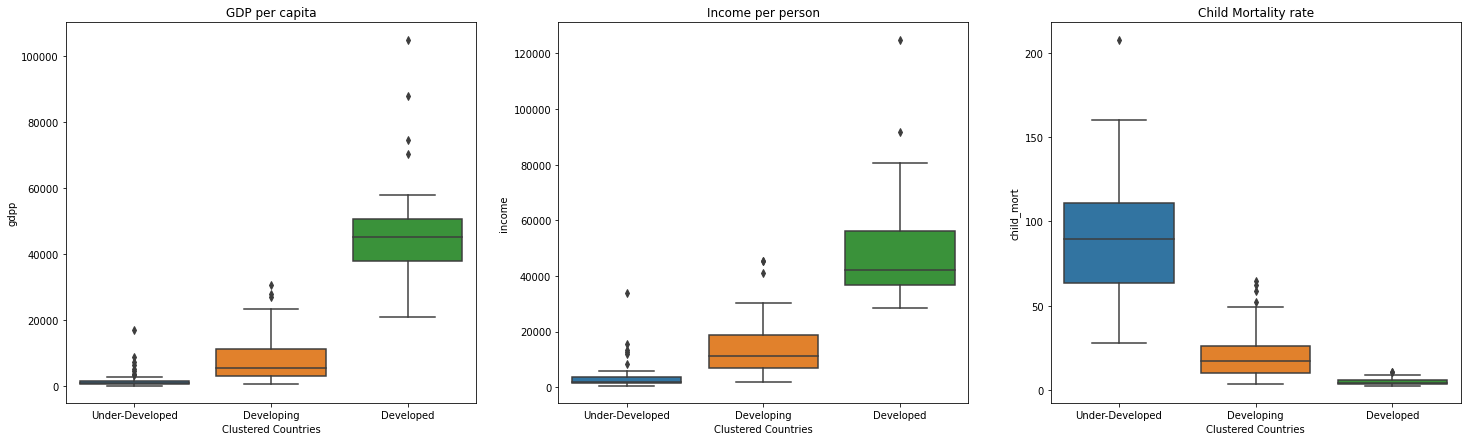

In [47]:
f,axes = plt.subplots(1,3,figsize=(25,7))

sns.boxplot(x='Clustered Countries',y='gdpp',data=finaldf,ax=axes[0]).set_title('GDP per capita')
sns.boxplot(x='Clustered Countries',y='income',data=finaldf,ax=axes[1]).set_title('Income per person')
sns.boxplot(x='Clustered Countries',y='child_mort',data=finaldf,ax=axes[2]).set_title('Child Mortality rate')
plt.show()

# Bar Charts of clustered developed countries wrt gdpp, income, child mortality

In [48]:
gdp_developed = finaldf[finaldf['Clustered Countries'] == 'Developed'].sort_values(by='gdpp',ascending=False)
income_developed = finaldf[finaldf['Clustered Countries'] == 'Developed'].sort_values(by='income',ascending=False)
child_developed = finaldf[finaldf['Clustered Countries'] == 'Developed'].sort_values(by='child_mort')

In [49]:
finaldf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Clustered Countries
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,Developing
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,Developing
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,Developing
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,2,Under-Developed


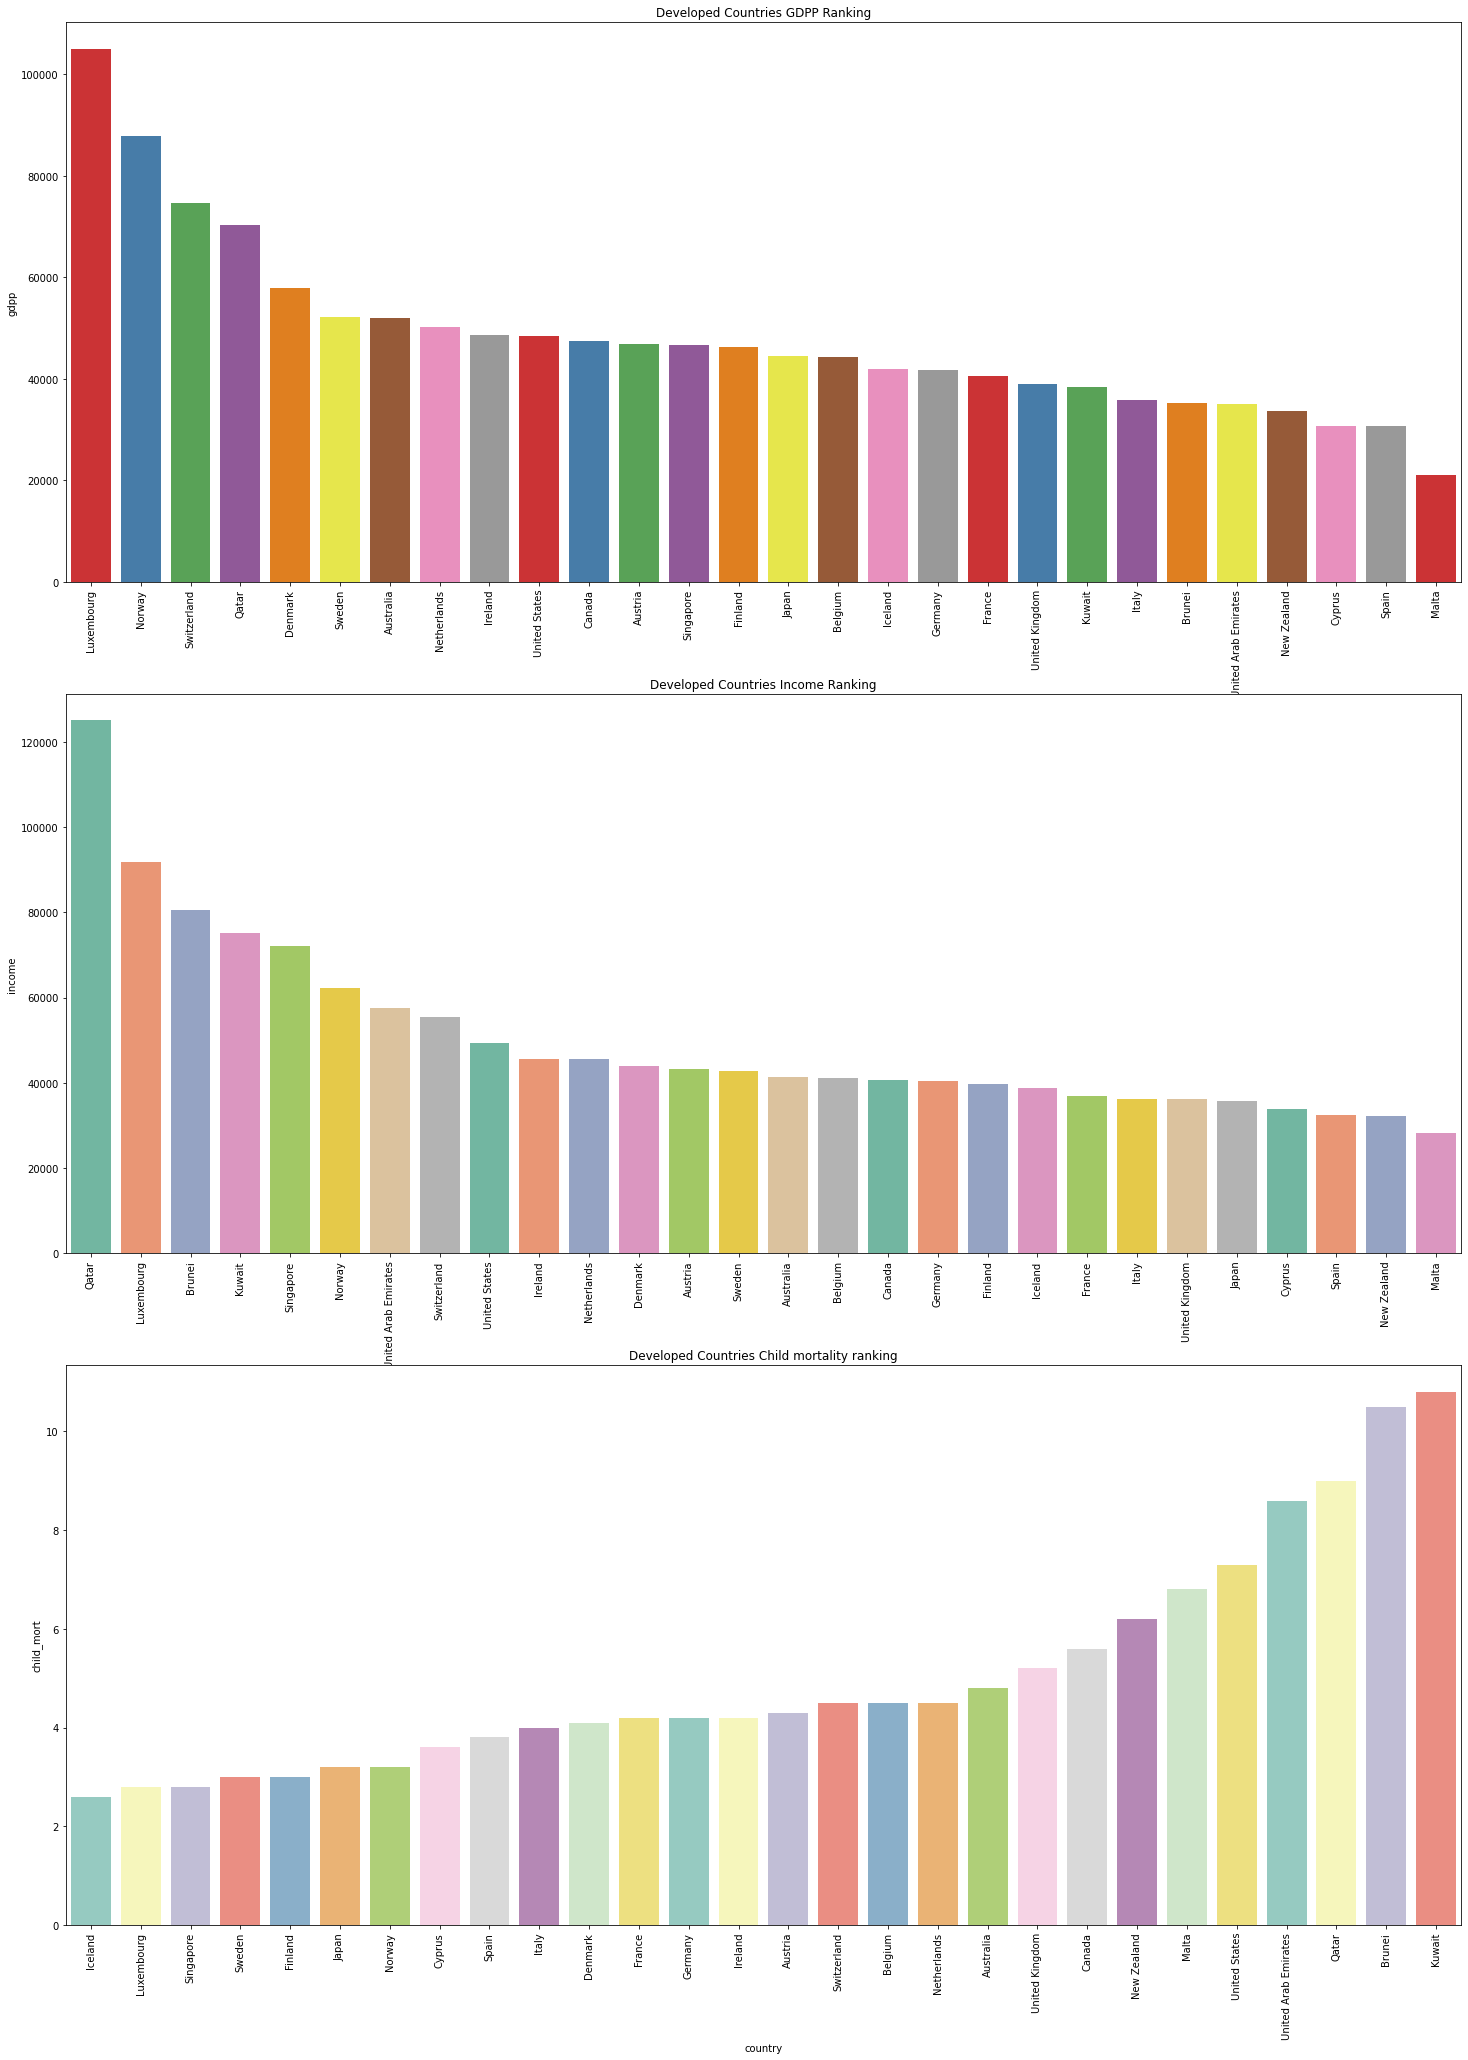

In [50]:
f,axes = plt.subplots(3,1,figsize=(25,35))

s = sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developed Countries GDPP Ranking')

s = sns.barplot(x='country',y='income',data=income_developed,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developed Countries Income Ranking')

s = sns.barplot(x='country',y='child_mort',data=child_developed,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developed Countries Child mortality ranking')

plt.show()

In [51]:
print('Top 10 Developed Countries based on GDPP\n')
for countries in gdp_developed.country[:10]:
  print(countries)

print('\nTop 10 Developed Countries based on High Income')
for countries in income_developed.country[:10]:
  print(countries)

print('\nTop 10 Developed Countries based on Low Child mortality')
for countries in child_developed.country[:10]:
  print(countries)

Top 10 Developed Countries based on GDPP

Luxembourg
Norway
Switzerland
Qatar
Denmark
Sweden
Australia
Netherlands
Ireland
United States

Top 10 Developed Countries based on High Income
Qatar
Luxembourg
Brunei
Kuwait
Singapore
Norway
United Arab Emirates
Switzerland
United States
Ireland

Top 10 Developed Countries based on Low Child mortality
Iceland
Luxembourg
Singapore
Sweden
Finland
Japan
Norway
Cyprus
Spain
Italy


# Bar Charts of clustered developing countries wrt gdpp, income, child mortality

In [52]:
gdp_developing = finaldf[finaldf['Clustered Countries'] == 'Developing'].sort_values(by='gdpp',ascending=False)
income_developing = finaldf[finaldf['Clustered Countries'] == 'Developing'].sort_values(by='income',ascending=False)
child_developing = finaldf[finaldf['Clustered Countries'] == 'Developing'].sort_values(by='child_mort')

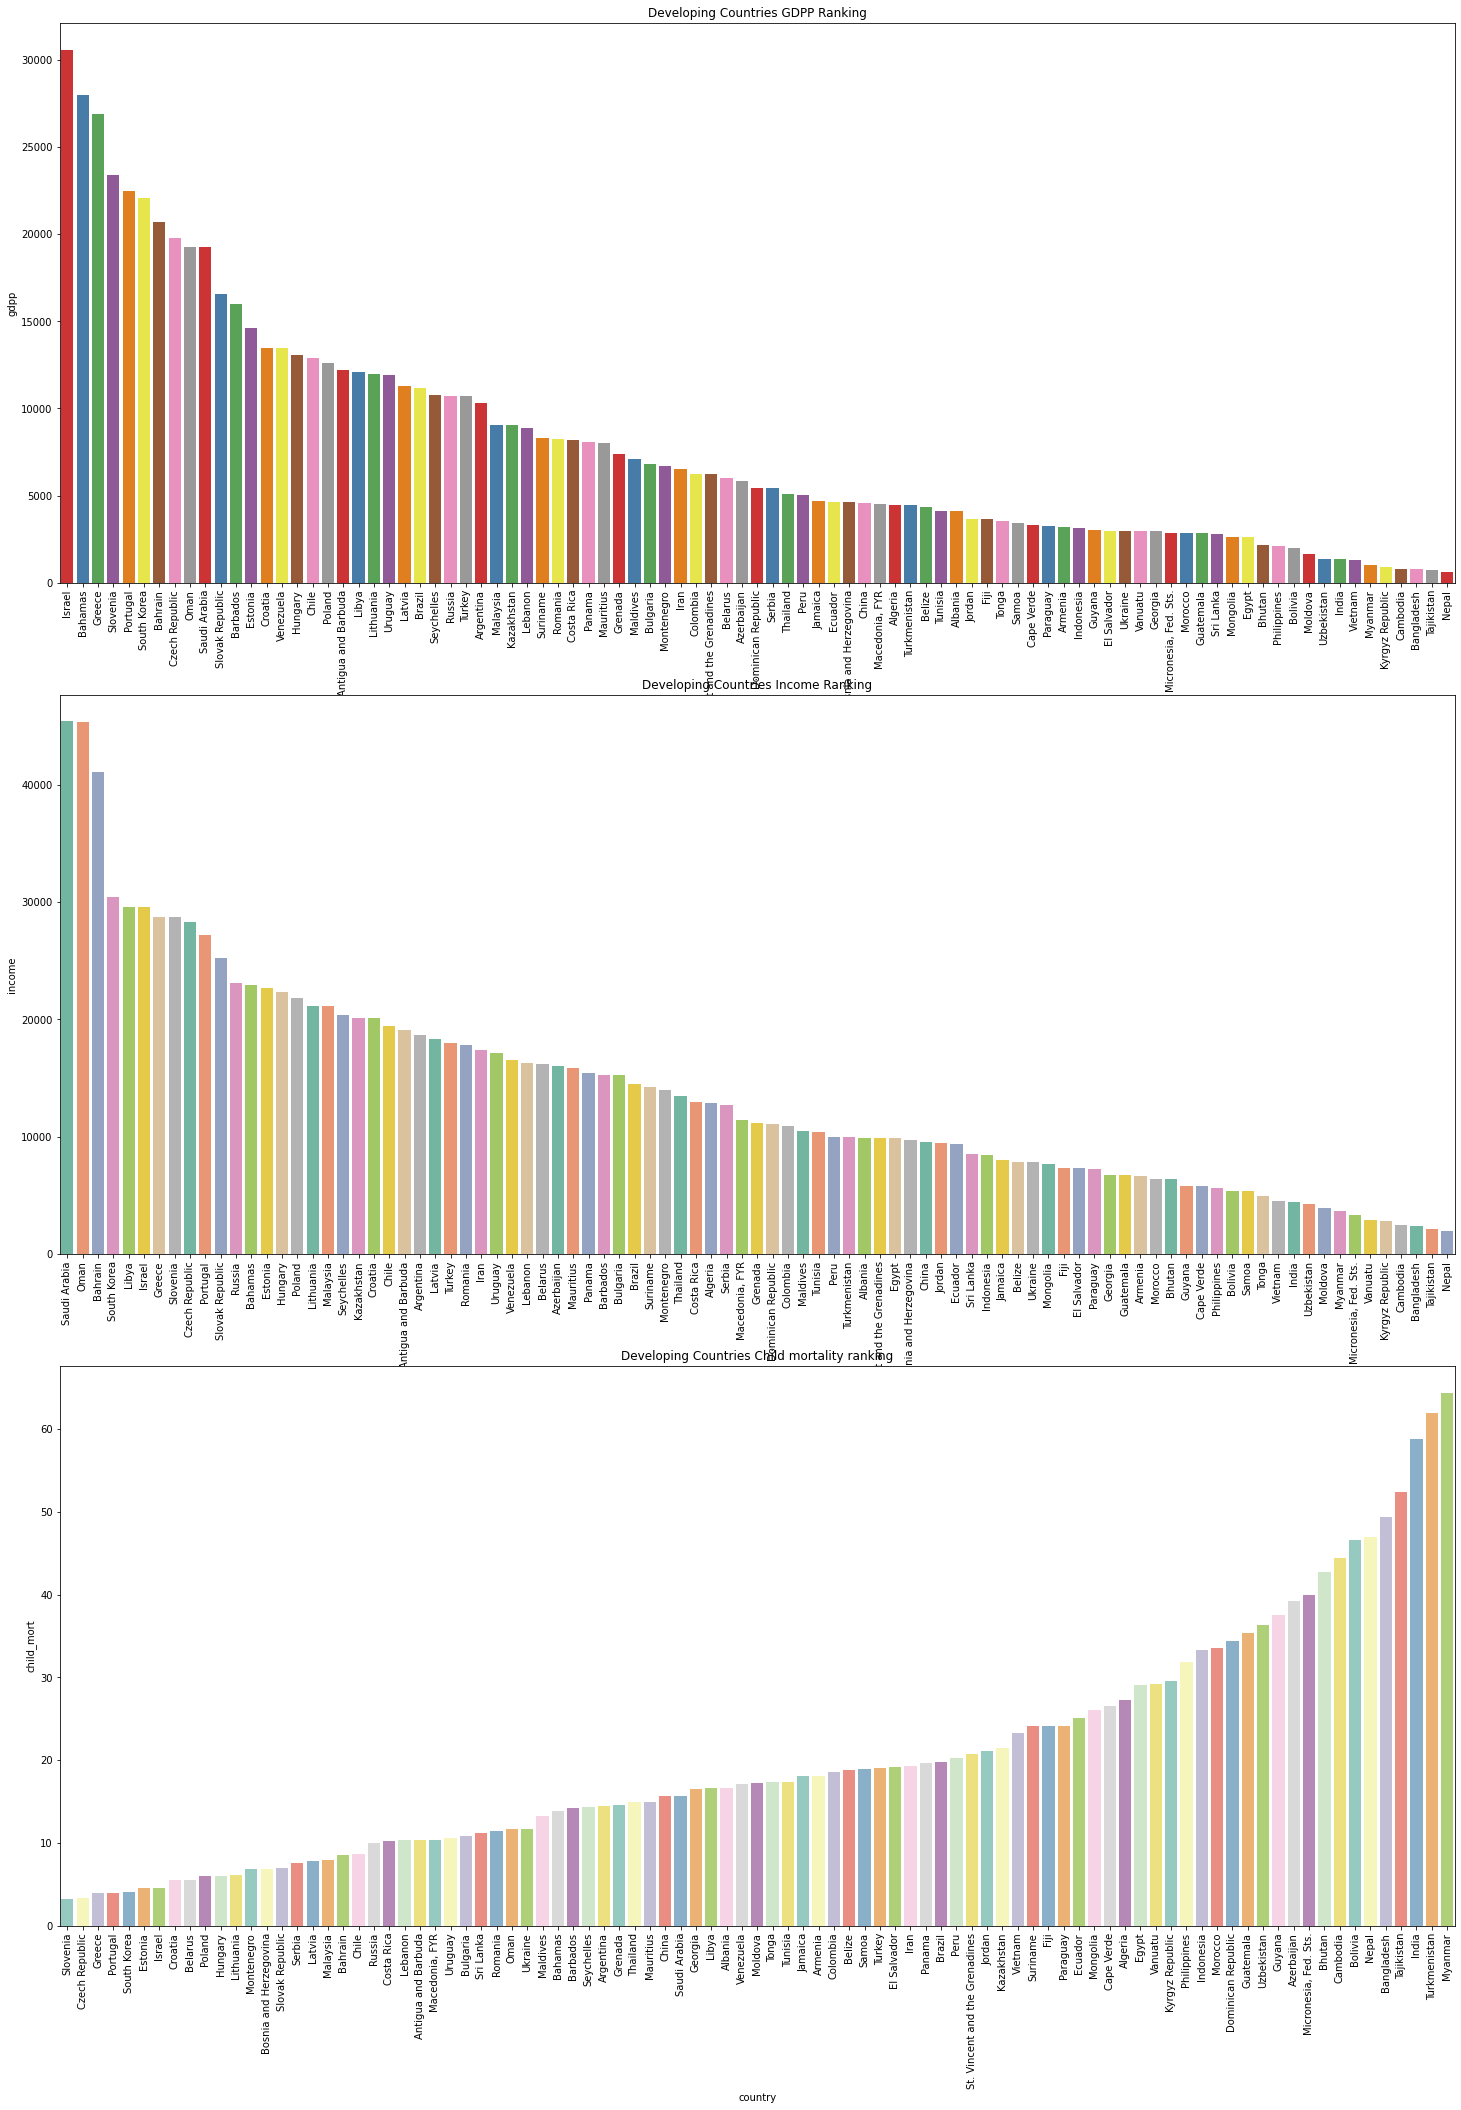

In [53]:
f,axes = plt.subplots(3,1,figsize=(25,35))

s = sns.barplot(x='country',y='gdpp',data=gdp_developing,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Developing Countries GDPP Ranking')

s = sns.barplot(x='country',y='income',data=income_developing,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Developing Countries Income Ranking')

s = sns.barplot(x='country',y='child_mort',data=child_developing,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Developing Countries Child mortality ranking')

plt.show()

# Bar Charts of clustered under-developed countries wrt gdpp, income, child mortality

In [54]:
gdp_underDeveloped = finaldf[finaldf['Clustered Countries'] == 'Under-Developed'].sort_values(by='gdpp',ascending=False)
income_underDeveloped = finaldf[finaldf['Clustered Countries'] == 'Under-Developed'].sort_values(by='income',ascending=False)
child_underDeveloped = finaldf[finaldf['Clustered Countries'] == 'Under-Developed'].sort_values(by='child_mort')

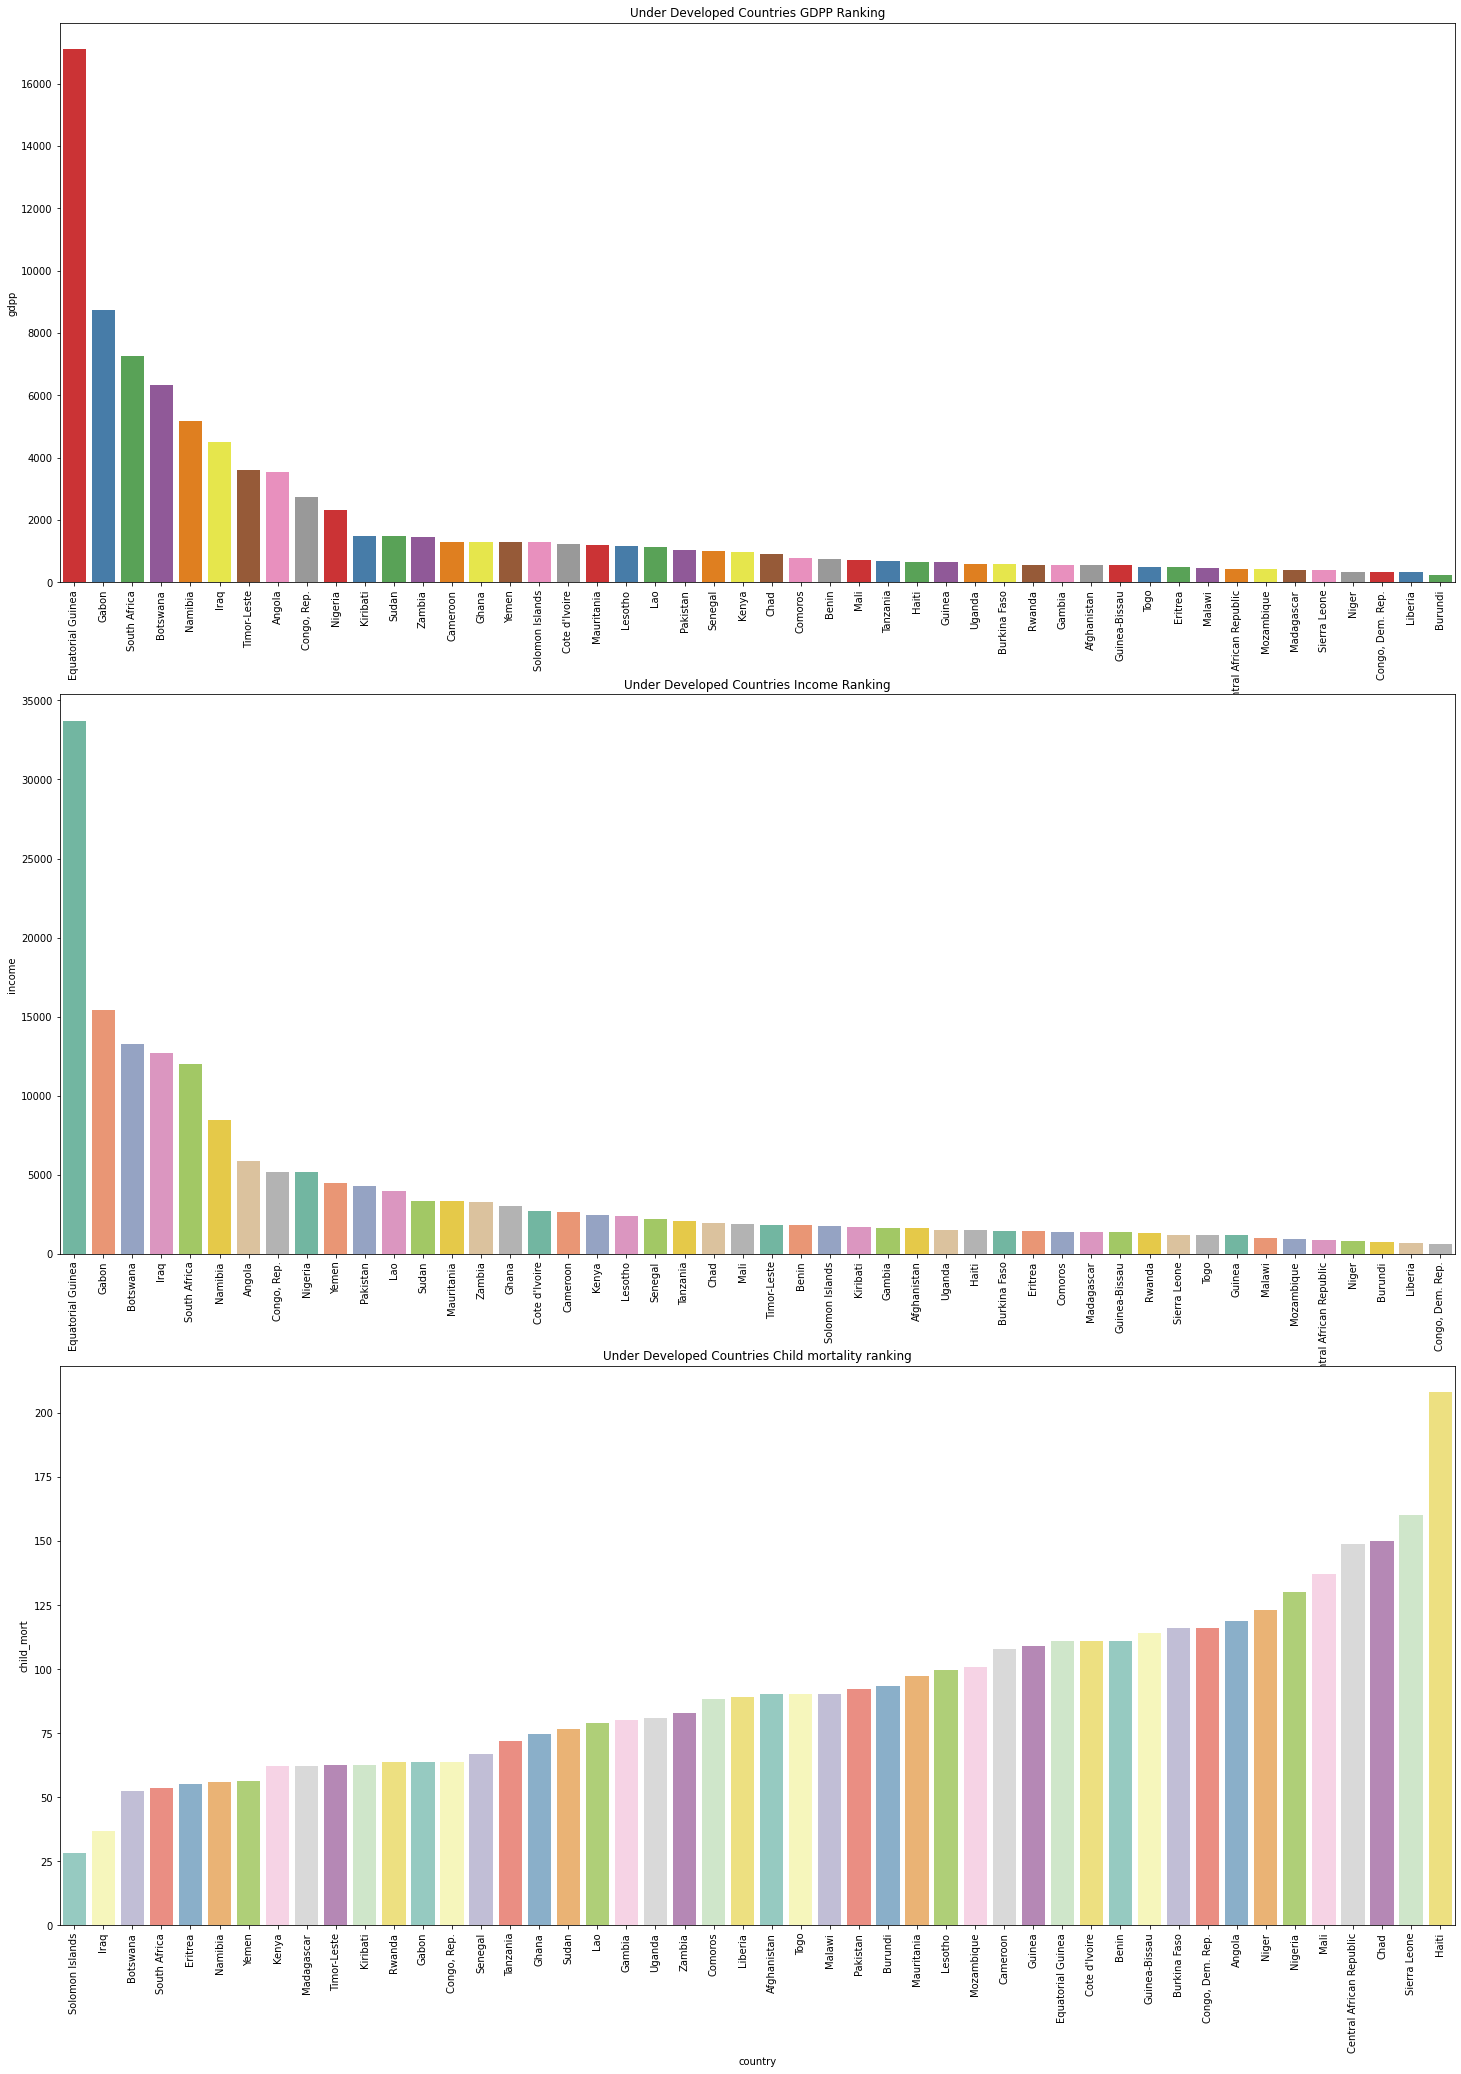

In [55]:
f,axes = plt.subplots(3,1,figsize=(25,35))

s = sns.barplot(x='country',y='gdpp',data=gdp_underDeveloped,palette='Set1',ax=axes[0])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[0].set_title('Under Developed Countries GDPP Ranking')

s = sns.barplot(x='country',y='income',data=income_underDeveloped,palette='Set2',ax=axes[1])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[1].set_title('Under Developed Countries Income Ranking')

s = sns.barplot(x='country',y='child_mort',data=child_underDeveloped,palette='Set3',ax=axes[2])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
axes[2].set_title('Under Developed Countries Child mortality ranking')

plt.show()

In [56]:
print('Top 10 Under Developed Countries based on GDPP\n')
for countries in gdp_underDeveloped.country[:10]:
  print(countries)

print('\nTop 10 Under Developed Countries based on High Income')
for countries in income_underDeveloped.country[:10]:
  print(countries)

print('\nTop 10 Under Developed Countries based on Low Child mortality')
for countries in child_underDeveloped.country[:10]:
  print(countries)

Top 10 Under Developed Countries based on GDPP

Equatorial Guinea
Gabon
South Africa
Botswana
Namibia
Iraq
Timor-Leste
Angola
Congo, Rep.
Nigeria

Top 10 Under Developed Countries based on High Income
Equatorial Guinea
Gabon
Botswana
Iraq
South Africa
Namibia
Angola
Congo, Rep.
Nigeria
Yemen

Top 10 Under Developed Countries based on Low Child mortality
Solomon Islands
Iraq
Botswana
South Africa
Eritrea
Namibia
Yemen
Kenya
Madagascar
Timor-Leste


# Top 10 Direct Needy Countries based on K Means 

In [57]:
data_dict.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [58]:
kneedy = data_dict[data_dict['gdpp'] <=  1909]
kneedy = kneedy[kneedy['child_mort'] >= 92]
kneedy = kneedy[kneedy['income'] <= 3897]
kneedy = pd.merge(kneedy,pca_data.loc[:,'ClusterID'],left_index=True,right_index=True)
kneedy = kneedy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,True])

print('\nTop 10 countries having direct need of aid based on overall conditions')
for countries in kneedy.country[:10]:
  print(countries)


Top 10 countries having direct need of aid based on overall conditions
Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti


# Hierarchical Clustering

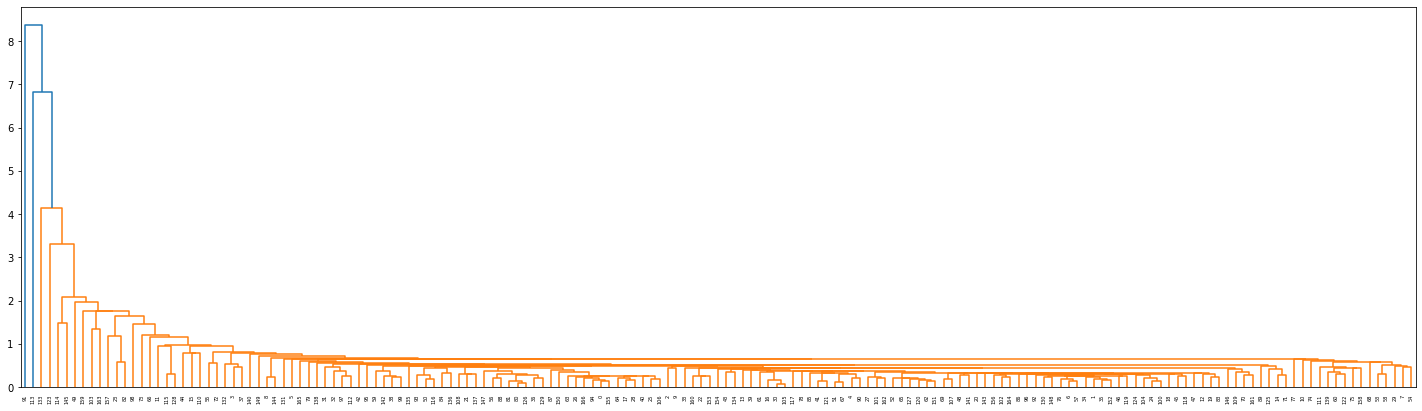

In [59]:
merging = linkage(pca_data.iloc[:,:5],method='single',metric='euclidean')
plt.figure(figsize=(25,7))
dn = dendrogram(merging)

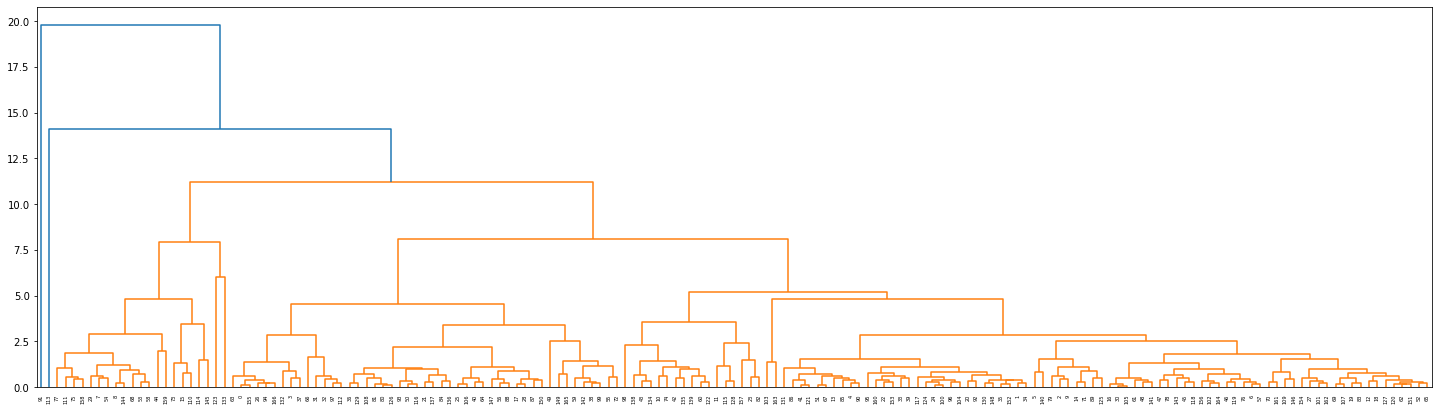

In [60]:
merging = linkage(pca_data.iloc[:,:5],method='complete',metric='euclidean')
plt.figure(figsize=(25,7))
dn = dendrogram(merging)

# As per above diagrams, let's selects no. of clusters as 3

In [61]:
h_clusters = cut_tree(merging,n_clusters=3)
pca_data['H_ClusterID'] = h_clusters.reshape(-1)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,H_ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0,0


In [62]:
# value counts of cluster ids
pca_data['H_ClusterID'].value_counts()

0    165
2      1
1      1
Name: H_ClusterID, dtype: int64

In [63]:
final_df = pd.merge(finaldf,pca_data.loc[:,'H_ClusterID'],left_index=True,right_index=True)
final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Clustered Countries,H_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,Developing,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,Developing,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,Developing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,Developing,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,Developing,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,Developing,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,2,Under-Developed,0


In [64]:
Cluster_GDPP = pd.DataFrame(final_df.groupby(['H_ClusterID']).gdpp.mean())
Cluster_child_mort = pd.DataFrame(final_df.groupby(['H_ClusterID']).child_mort.mean())
Cluster_income_H = pd.DataFrame(final_df.groupby(['H_ClusterID']).income.mean())

H_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income_H],axis=1)
H_mean_df

,gdpp,child_mort,income
H_ClusterID,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


In [65]:
k_mean_df

,gdpp,child_mort,income
ClusterID,,,
Developing,7979.912088,20.357143,13968.021978
Developed,48114.285714,5.046429,50178.571429
Under-Developed,1909.208333,91.610417,3897.354167


By comparing averages of K-means and Hierarchical Clustering, we can conclude that

- Cluster 2 belongs to Under-Developed Countries,

- Cluster 1 belongs to Developed Countries

- Cluster 0 belongs to Developing Countries.


In [66]:
H_needy = data_dict[data_dict['gdpp'] <= 2330 ]
H_needy = H_needy[H_needy['child_mort'] >= 130 ]
H_needy = H_needy[H_needy['income'] <= 3897.35 ]

H_needy=pd.merge(H_needy,pca_data.loc[:,'H_ClusterID'],left_index=True,right_index=True)
H_needy=H_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

print('Countries having direct need of aid based Hierarchical clustering are as follows: \n')
for countries in H_needy.country:
  print(countries)

Countries having direct need of aid based Hierarchical clustering are as follows: 

Sierra Leone
Central African Republic
Haiti
Mali
Chad
